<a href="https://colab.research.google.com/github/gabrielmatina/previsao-valores-bitcoin/blob/main/Prevendo_Valores_Bitcoin_Series_Temporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalações e Importações de Bibliotecas

---



In [1]:
# Instalando a biblioteca yfinance(YahooFinance) para baixar as cotações do Bitcoin

!pip install yfinance

# Importante a biblioteca yfinance e atribuindo a ela um alias yf

import yfinance as yf

# Importando as bibliotecas Pandas e NumPy para manipulação dos dados

import pandas as pd
import numpy as np

# Importando as bibliotecas MatPlotLib e Seaborn para visualização dos dados

import matplotlib.pyplot as plt
import matplotlib as m
import seaborn as sns

# Importando a Biblioteca Scipy para fazer os calculos estatísticos

import scipy
import scipy.stats as st

# Importando a Biblioteca sklearn para criar e treinar os modelos

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Importando a Biblioteca warnings para ignorar algumas mensagens de alerta

import warnings
warnings.filterwarnings('ignore')



# Criando um grafico padrão para que todos tenham um mesmo padrão de tamanho e cor

plt.style.use('fivethirtyeight')
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['text.color'] = 'k'
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

# Formatando os valores com duas casas decimais

pd.options.display.float_format = '{:,.2f}'.format

# Carregamento dos Dados

In [2]:
cotacao = yf.Ticker('BTC-USD')

todos_dados = cotacao.history(period='max')
# todos_dados.head()
dados = cotacao.history(period='1y')
dados.head()

print(f'Data inicial: {todos_dados.index[0]}')
print(f'Data final: {todos_dados.index[-1]}')

Data inicial: 2014-09-17 00:00:00+00:00
Data final: 2025-03-26 00:00:00+00:00


# ETL dos Dados

In [3]:
# Removendo as colunas Dividends e Stock Splits, pois todos os seus valores estão zerados

dados.drop('Dividends', axis=1, inplace=True)
dados.drop('Stock Splits', axis=1, inplace=True)

# Renomeando as colunas

dados.columns = ['Abertura', 'Máximo', 'Mínimo', 'Fechamento', 'Volume']

dados.head()

,Abertura,Máximo,Mínimo,Fechamento,Volume
Date,,,,,
2024-03-26 00:00:00+00:00,"69,931.33","71,535.74","69,335.61","69,987.84",36010437368
2024-03-27 00:00:00+00:00,"69,991.90","71,727.69","68,381.93","69,455.34",40827113309
2024-03-28 00:00:00+00:00,"69,452.77","71,546.02","68,895.51","70,744.95",34374900617
2024-03-29 00:00:00+00:00,"70,744.80","70,913.09","69,076.66","69,892.83",25230851763
2024-03-30 00:00:00+00:00,"69,893.45","70,355.49","69,601.06","69,645.30",17130241883


In [4]:
# Removendo as colunas Dividends e Stock Splits, pois todos os seus valores estão zerados

todos_dados.drop('Dividends', axis=1, inplace=True)
todos_dados.drop('Stock Splits', axis=1, inplace=True)

# Renomeando as colunas

todos_dados.columns = ['Abertura', 'Máximo', 'Mínimo', 'Fechamento', 'Volume']

todos_dados.head()

,Abertura,Máximo,Mínimo,Fechamento,Volume
Date,,,,,
2014-09-17 00:00:00+00:00,465.86,468.17,452.42,457.33,21056800
2014-09-18 00:00:00+00:00,456.86,456.86,413.10,424.44,34483200
2014-09-19 00:00:00+00:00,424.10,427.83,384.53,394.80,37919700
2014-09-20 00:00:00+00:00,394.67,423.30,389.88,408.90,36863600
2014-09-21 00:00:00+00:00,408.08,412.43,393.18,398.82,26580100


# Análise Exploratória e Estatística Descritiva

#### Visualizações e análise estatística para entender os dados.



In [5]:
# Resumo estatístico dos dados do último ano

dados.describe()

,Abertura,Máximo,Mínimo,Fechamento,Volume
count,366.00,366.00,366.00,366.00,366.00
mean,"75,567.58","77,047.88","74,023.35","75,615.19","39,975,752,071.18"
std,"15,738.49","16,054.59","15,393.36","15,747.09","23,146,817,127.78"
min,"53,949.09","54,838.14","49,121.24","53,948.75","9,858,198,793.00"
25%,"63,067.98","64,137.99","61,763.42","63,065.78","25,613,881,196.75"
50%,"68,277.70","69,481.64","67,093.66","68,276.04","33,791,969,002.50"
75%,"93,501.67","95,142.02","91,358.09","93,504.97","47,164,252,539.00"
max,"106,147.30","109,114.88","105,291.73","106,146.27","149,218,945,580.00"


In [6]:
# Resumo estatístico de todos os dados

todos_dados.describe()

,Abertura,Máximo,Mínimo,Fechamento,Volume
count,"3,844.00","3,844.00","3,844.00","3,844.00","3,844.00"
mean,"21,209.06","21,680.04","20,712.81","21,230.53","19,175,670,509.96"
std,"24,466.20","24,986.15","23,914.58","24,485.76","20,799,389,942.48"
min,176.90,211.73,171.51,178.10,"5,914,570.00"
25%,"1,528.33","1,592.24","1,520.41","1,551.00","634,251,504.00"
50%,"9,614.80","9,780.75","9,404.67","9,621.54","15,313,985,888.00"
75%,"34,301.62","35,222.13","33,360.73","34,345.87","30,381,877,450.50"
max,"106,147.30","109,114.88","105,291.73","106,146.27","350,967,941,479.00"


In [7]:
# Calculando o percentual de mudança na cotação de fechamento diário das ações do último ano

retorno_diario_ultimo_ano = dados['Fechamento'].pct_change().dropna()
dados = dados.iloc[1:]
dados['Variacao_Diaria'] = retorno_diario_ultimo_ano.values
dados.head()


,Abertura,Máximo,Mínimo,Fechamento,Volume,Variacao_Diaria
Date,,,,,,
2024-03-27 00:00:00+00:00,"69,991.90","71,727.69","68,381.93","69,455.34",40827113309,-0.01
2024-03-28 00:00:00+00:00,"69,452.77","71,546.02","68,895.51","70,744.95",34374900617,0.02
2024-03-29 00:00:00+00:00,"70,744.80","70,913.09","69,076.66","69,892.83",25230851763,-0.01
2024-03-30 00:00:00+00:00,"69,893.45","70,355.49","69,601.06","69,645.30",17130241883,-0.00
2024-03-31 00:00:00+00:00,"69,647.78","71,377.78","69,624.87","71,333.65",20050941373,0.02


In [8]:
# Calculando o percentual de mudança na cotação de fechamento diário das de todas as ações

retorno_diario_geral = todos_dados['Fechamento'].pct_change().dropna()
todos_dados = todos_dados.iloc[1:]  # Remove a primeira linha, pois pct_change().dropna() também a remove
todos_dados['Variacao_Diaria'] = retorno_diario_geral.values
todos_dados.head()


,Abertura,Máximo,Mínimo,Fechamento,Volume,Variacao_Diaria
Date,,,,,,
2014-09-18 00:00:00+00:00,456.86,456.86,413.10,424.44,34483200,-0.07
2014-09-19 00:00:00+00:00,424.10,427.83,384.53,394.80,37919700,-0.07
2014-09-20 00:00:00+00:00,394.67,423.30,389.88,408.90,36863600,0.04
2014-09-21 00:00:00+00:00,408.08,412.43,393.18,398.82,26580100,-0.02
2014-09-22 00:00:00+00:00,399.10,406.92,397.13,402.15,24127600,0.01


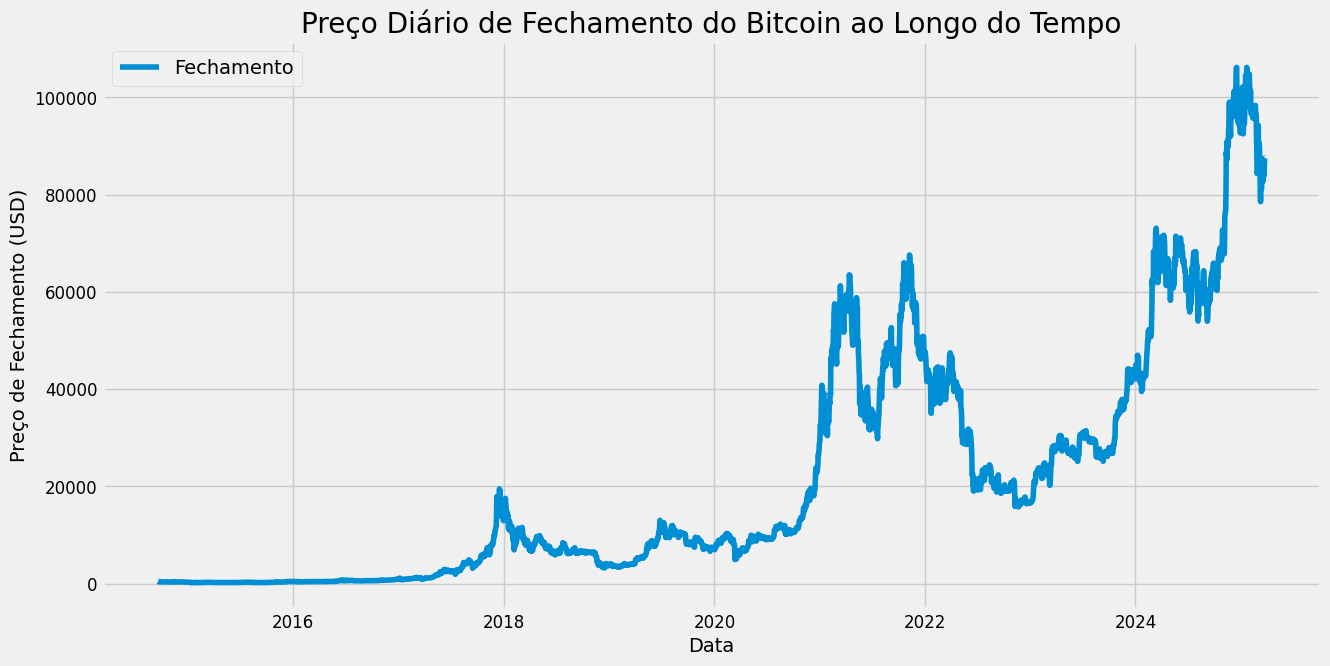

In [9]:
# Plotando gráfico com o preço de fechamento ao longo do tempo

plt.figure(figsize=(14,7))
plt.plot(todos_dados.index, todos_dados['Fechamento'], label='Fechamento')
plt.title('Preço Diário de Fechamento do Bitcoin ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento (USD)')
plt.legend()
plt.show()


## Distribuição da Variação Diária
#### Visualizando a distribuição da variação diária para entender a volatilidade do Bitcoin ao longo do tempo.

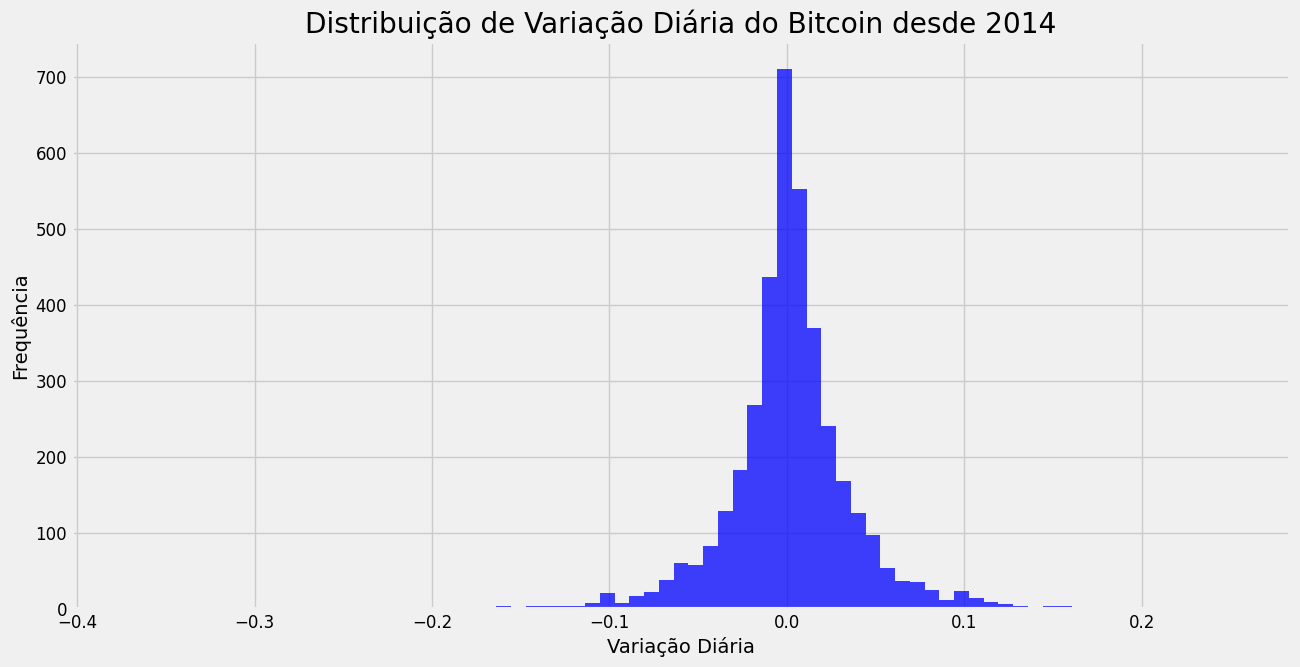

In [10]:
# Plot da distribuição da variação diária

plt.figure(figsize=(14,7))
plt.hist(todos_dados['Variacao_Diaria'], bins=75, alpha=0.75, color='blue')
plt.title('Distribuição de Variação Diária do Bitcoin desde 2014')
plt.xlabel('Variação Diária')
plt.ylabel('Frequência')
plt.show()


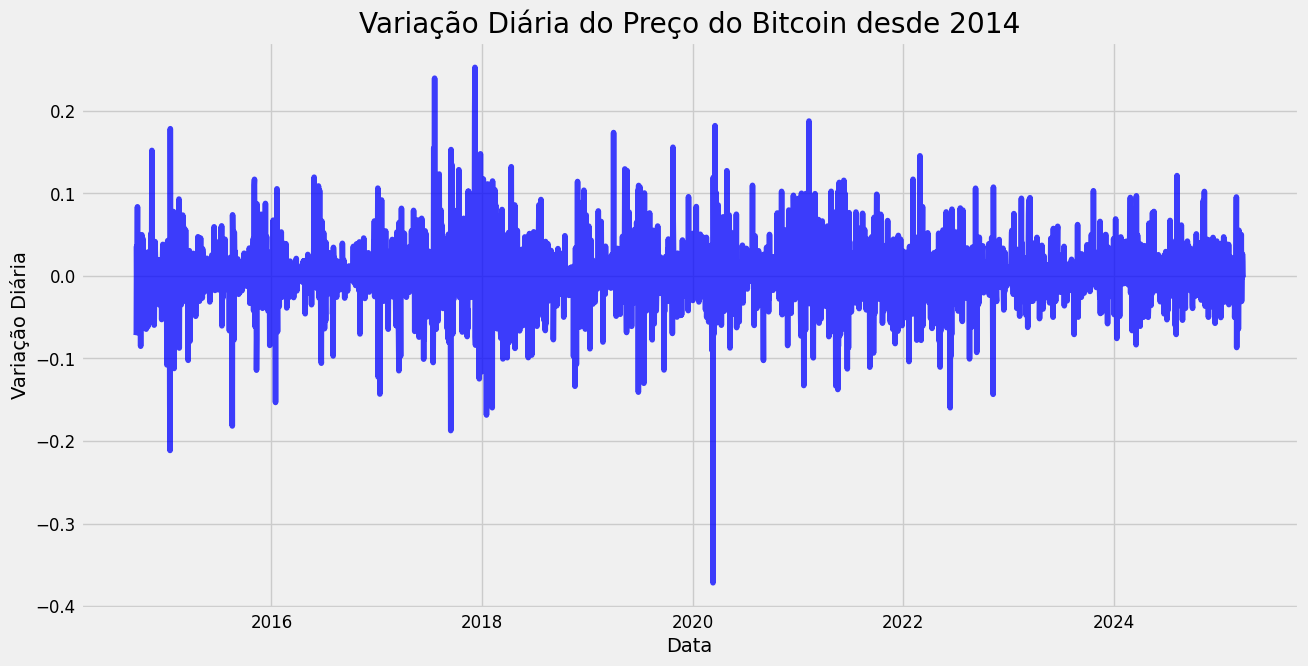

In [11]:
# Plot da série temporal da variação diária

plt.figure(figsize=(14,7))
plt.plot(todos_dados['Variacao_Diaria'], alpha=0.75, color='blue')
plt.title('Variação Diária do Preço do Bitcoin desde 2014')
plt.xlabel('Data')
plt.ylabel('Variação Diária')
plt.show()

## Analisando a Variação Diária com Log Transformation

#### Aplicar a transformação logarítmica para identificar a assimetria dos dados e plotar os resultados.


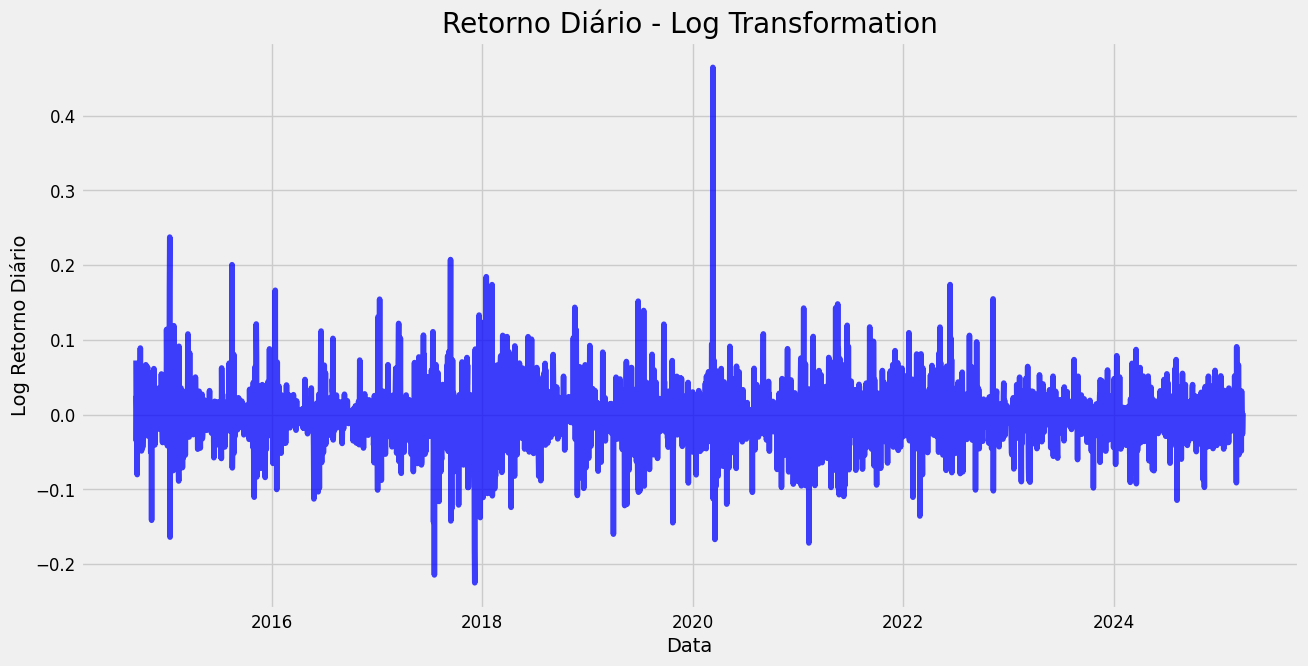

In [12]:
# Aplicando o log para identificar a assimetria dos dados

log_retorno_diario = (np.log(todos_dados['Fechamento']) - np.log(todos_dados['Fechamento']).shift(-1)).dropna()

# Plot com o retorno diário da série transformada

plt.figure(figsize=(14,7))
plt.plot(log_retorno_diario, alpha=0.75, color='blue')
plt.title('Retorno Diário - Log Transformation')
plt.xlabel('Data')
plt.ylabel('Log Retorno Diário')
plt.show()


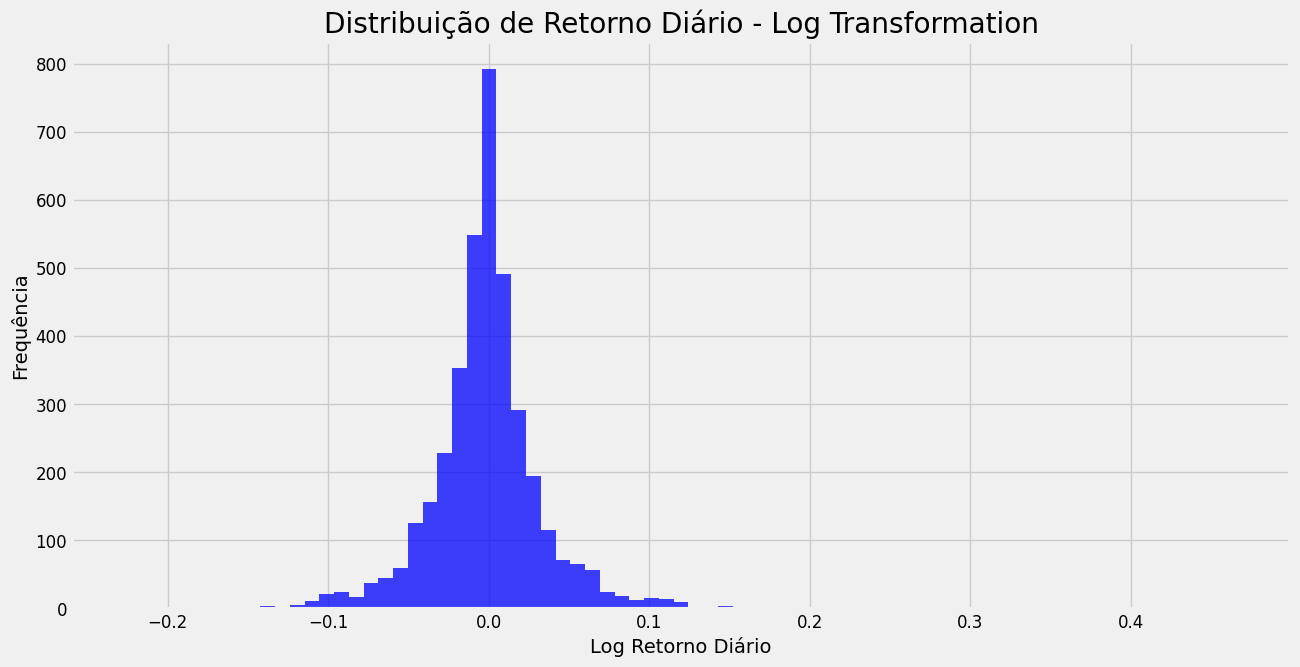

In [13]:
# Plotando os dados após a aplicação do log

plt.figure(figsize=(14,7))
plt.hist(log_retorno_diario, bins=75, alpha=0.75, color='blue')
plt.title('Distribuição de Retorno Diário - Log Transformation')
plt.xlabel('Log Retorno Diário')
plt.ylabel('Frequência')
plt.show()


# Treinamento e Avaliação do Modelo de Regressão Linear


In [14]:
# Preparação dos dados

X_todos = todos_dados[['Abertura', 'Máximo', 'Mínimo', 'Volume', 'Variacao_Diaria']]
y_todos = todos_dados['Fechamento']

# Dividindo os dados

X_train_todos, X_test_todos, y_train_todos, y_test_todos = train_test_split(X_todos, y_todos, test_size=0.2, random_state=42)

# Criando o modelo de regressão linear

modelo_todos = LinearRegression()

# Treinando o modelo

modelo_todos.fit(X_train_todos, y_train_todos)

# Fazendo previsões

y_pred_todos = modelo_todos.predict(X_test_todos)

# Calculando RMSE

rmse_todos = np.sqrt(mean_squared_error(y_test_todos, y_pred_todos))
print(f'Root Mean Squared Error (RMSE): {rmse_todos}')

# Calculando MAE

mae_todos = mean_absolute_error(y_test_todos, y_pred_todos)
print(f'Mean Absolute Error (MAE): {mae_todos}')


Root Mean Squared Error (RMSE): 342.11175767455387
Mean Absolute Error (MAE): 195.22340337246072


# Análise dos Resultados e Visualizações

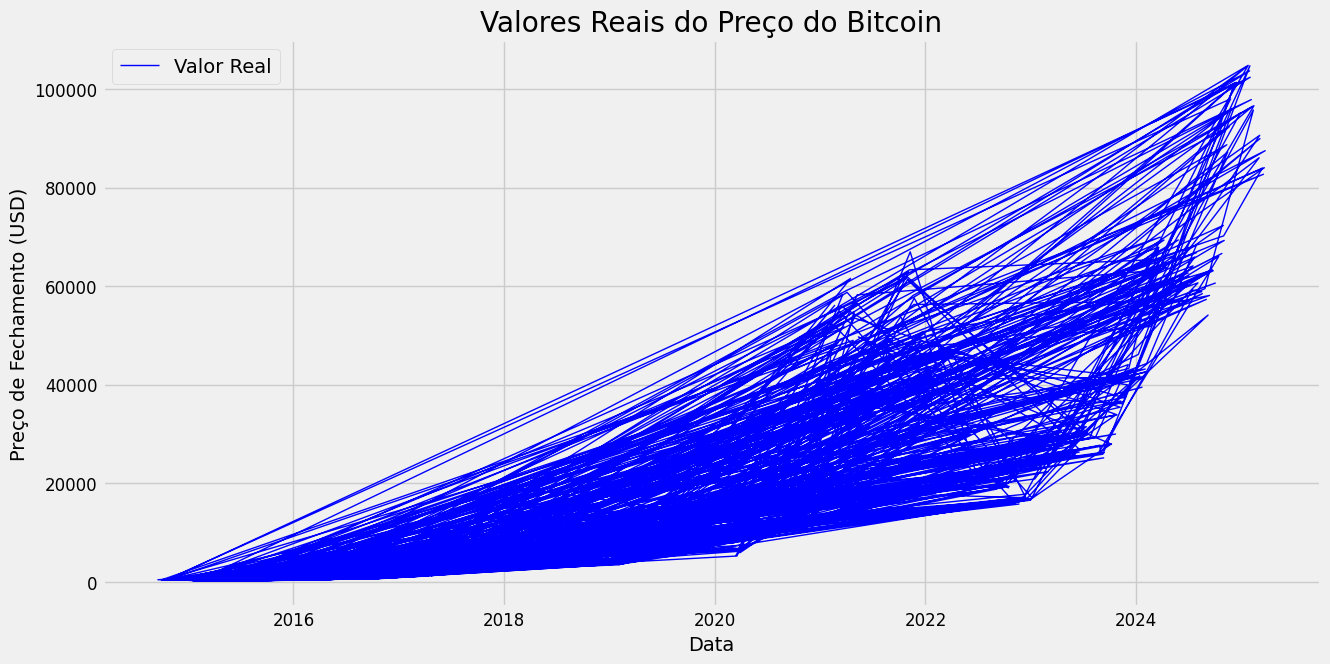

In [15]:
# Plot com os resultados do modelo

# Plotando os valores reais
plt.figure(figsize=(14,7))
plt.plot(y_test_todos.index, y_test_todos, label='Valor Real', color='blue', linewidth=1)
plt.legend()
plt.title('Valores Reais do Preço do Bitcoin')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento (USD)')
plt.show()


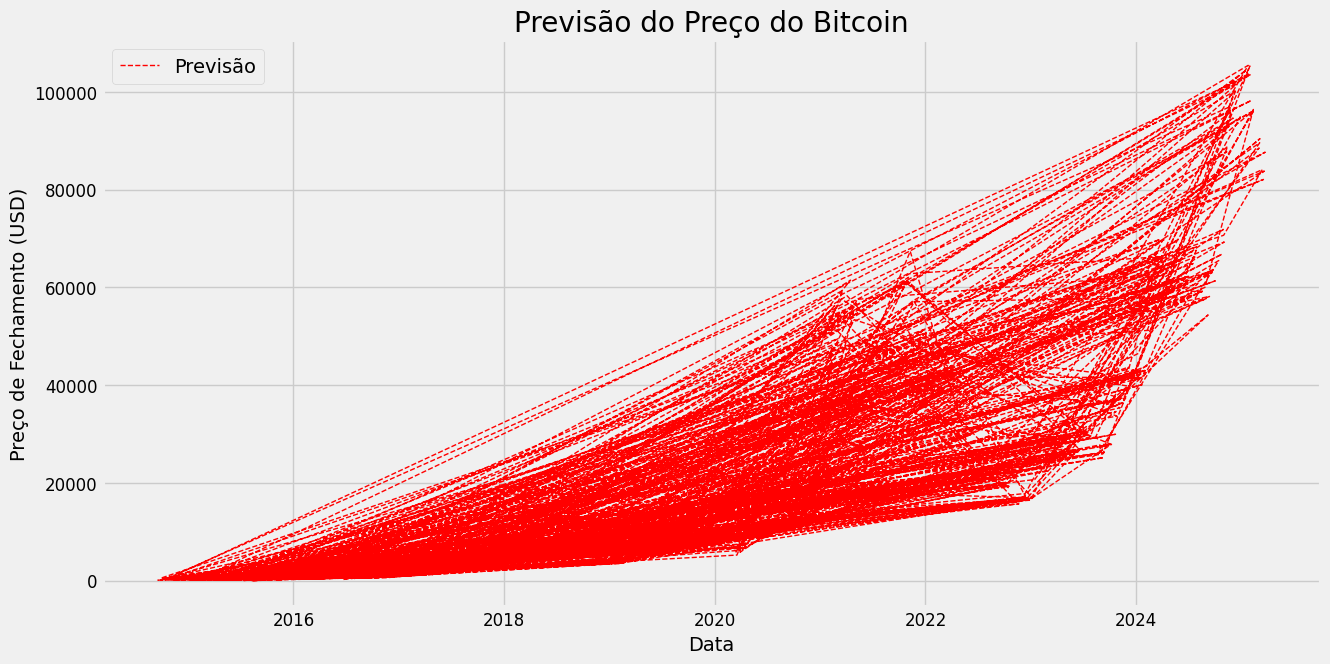

In [16]:
# Plotando as previsões

plt.figure(figsize=(14,7))
plt.plot(y_test_todos.index, y_pred_todos, label='Previsão', color='red', linewidth=1, linestyle='--')
plt.legend()
plt.title('Previsão do Preço do Bitcoin')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento (USD)')
plt.show()

# Intervalo de Confiança

In [17]:
# Um intervalo de confiança de 90% para nossas previsões é calculado usando um fator de confiança de aproximadamente 1.645.
# Isso significa que, para um valor predito, podemos esperar que o valor real do preço do Bitcoin caia dentro deste intervalo em 90% das vezes.
# Por exemplo, se o nosso modelo previu um preço de $30,000 para o Bitcoin, o intervalo de confiança de 90% seria:


# Calcule o erro padrão das previsões

stdev = np.std(y_test_todos - y_pred_todos)

# Defina o fator de confiança para 90%

confidence_factor = 1.645

# Calcule o intervalo de confiança para 90%

margin_of_error_90 = confidence_factor * stdev
print(f'Intervalo de Confiança de 90%: ±{margin_of_error_90}')

# Exemplo para um valor predito de $30,000

predicted_value = 30000
lower_bound = predicted_value - margin_of_error_90
upper_bound = predicted_value + margin_of_error_90

print(f'Para um valor predito de $30,000, o intervalo de confiança de 90% é entre ${lower_bound:.2f} e ${upper_bound:.2f}')


Intervalo de Confiança de 90%: ±561.7805903875319
Para um valor predito de $30,000, o intervalo de confiança de 90% é entre $29438.22 e $30561.78


# Análise de Resíduos


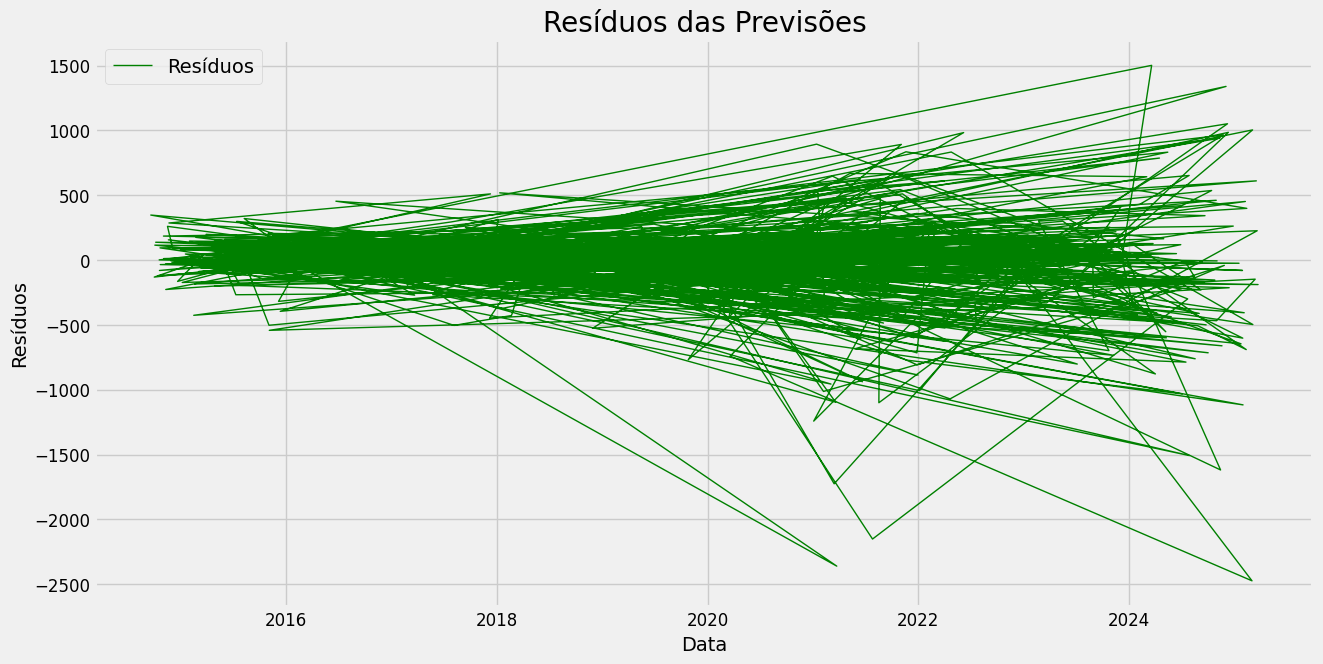

In [18]:
# Calculando resíduos

residuos = y_test_todos - y_pred_todos

# Plotando os resíduos

plt.figure(figsize=(14,7))
plt.plot(y_test_todos.index, residuos, label='Resíduos', color='green', linewidth=1)
plt.legend()
plt.title('Resíduos das Previsões')
plt.xlabel('Data')
plt.ylabel('Resíduos')
plt.show()


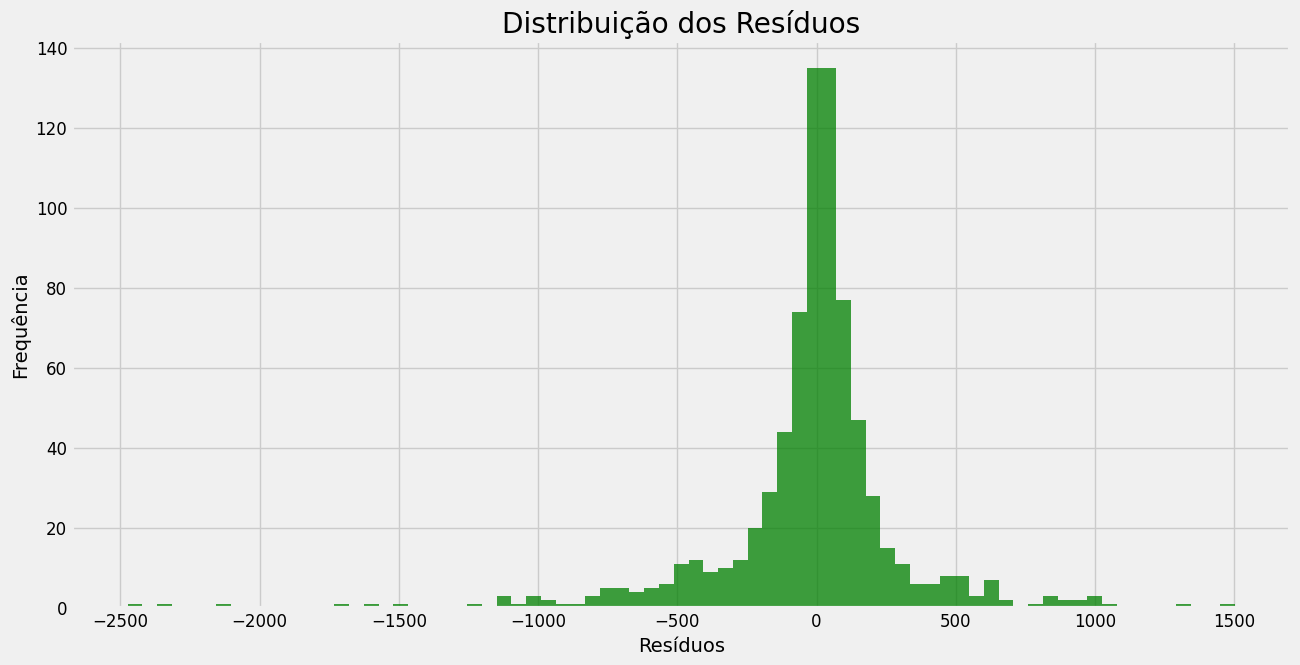

In [19]:
# Plotando histograma dos resíduos

plt.figure(figsize=(14,7))
plt.hist(residuos, bins=75, alpha=0.75, color='green')
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.show()

# Análise Exploratória e Estatística Descritiva

#### Neste passo, faremos uma análise descritiva dos dados.


In [20]:
# Resumo estatístico dos dados do último ano

dados.describe()

,Abertura,Máximo,Mínimo,Fechamento,Volume,Variacao_Diaria
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,"75,583.03","77,062.98","74,036.19","75,630.61","39,986,615,947.08",0.00
std,"15,757.32","16,074.02","15,412.52","15,765.94","23,177,655,996.63",0.03
min,"53,949.09","54,838.14","49,121.24","53,948.75","9,858,198,793.00",-0.09
25%,"63,055.19","64,125.69","61,752.75","63,049.96","25,604,805,221.00",-0.01
50%,"68,259.05","69,462.73","67,085.83","68,255.87","33,748,230,056.00",-0.00
75%,"93,527.20","95,174.88","91,371.74","93,530.23","47,180,685,494.00",0.01
max,"106,147.30","109,114.88","105,291.73","106,146.27","149,218,945,580.00",0.12


In [21]:
# Resumo estatístico de todos os dados

todos_dados.describe()

,Abertura,Máximo,Mínimo,Fechamento,Volume,Variacao_Diaria
count,"3,843.00","3,843.00","3,843.00","3,843.00","3,843.00","3,843.00"
mean,"21,214.45","21,685.56","20,718.08","21,235.93","19,180,654,796.64",0.00
std,"24,467.10","24,987.06","23,915.46","24,486.66","20,799,800,518.40",0.04
min,176.90,211.73,171.51,178.10,"5,914,570.00",-0.37
25%,"1,548.84","1,602.82","1,536.41","1,567.12","672,255,488.00",-0.01
50%,"9,617.82","9,782.31","9,407.06","9,629.66","15,320,605,300.00",0.00
75%,"34,307.30","35,224.37","33,374.72","34,375.36","30,399,090,730.00",0.02
max,"106,147.30","109,114.88","105,291.73","106,146.27","350,967,941,479.00",0.25


# Feature Engineering


In [22]:
# Calculando médias móveis

todos_dados['Media_Movel_7'] = todos_dados['Fechamento'].rolling(window=7).mean()
todos_dados['Media_Movel_30'] = todos_dados['Fechamento'].rolling(window=30).mean()

# Calculando volatilidade (desvio padrão)

todos_dados['Volatilidade_7'] = todos_dados['Fechamento'].rolling(window=7).std()
todos_dados['Volatilidade_30'] = todos_dados['Fechamento'].rolling(window=30).std()

# Drop NaN rows resulting from rolling calculations

todos_dados = todos_dados.dropna()

# Preparação dos dados com as novas features

X_todos = todos_dados[['Abertura', 'Máximo', 'Mínimo', 'Volume', 'Variacao_Diaria', 'Media_Movel_7', 'Media_Movel_30', 'Volatilidade_7', 'Volatilidade_30']]
y_todos = todos_dados['Fechamento']

# Dividindo os dados

X_train_todos, X_test_todos, y_train_todos, y_test_todos = train_test_split(X_todos, y_todos, test_size=0.2, random_state=42)

# Treinando o modelo novamente

modelo_todos.fit(X_train_todos, y_train_todos)

# Fazendo previsões novamente

y_pred_todos = modelo_todos.predict(X_test_todos)

# Calculando RMSE e MAE novamente

rmse_todos = np.sqrt(mean_squared_error(y_test_todos, y_pred_todos))
print(f'Root Mean Squared Error (RMSE) com novas features: {rmse_todos}')

mae_todos = mean_absolute_error(y_test_todos, y_pred_todos)
print(f'Mean Absolute Error (MAE) com novas features: {mae_todos}')


Root Mean Squared Error (RMSE) com novas features: 402.60813803625274
Mean Absolute Error (MAE) com novas features: 222.13144054018542


# Visualização dos Resultados com Novas Features

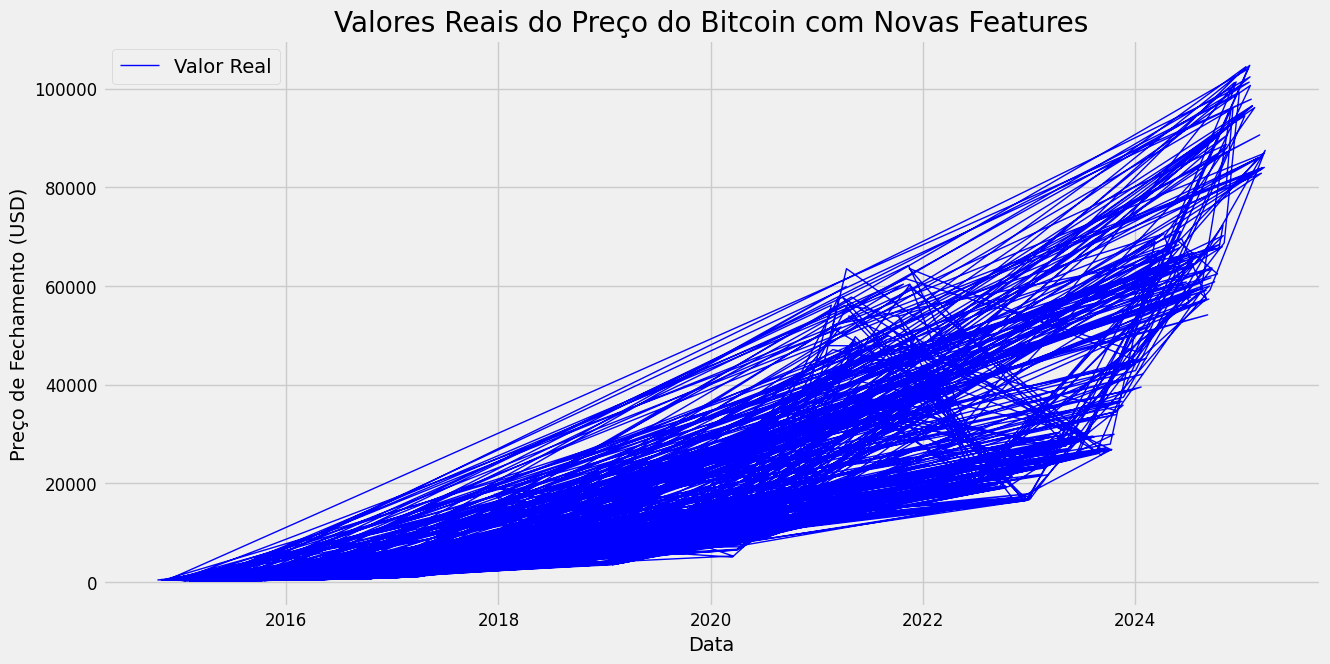

In [23]:
# Plotando os valores reais:

plt.figure(figsize=(14,7))
plt.plot(y_test_todos.index, y_test_todos, label='Valor Real', color='blue', linewidth=1)
plt.legend()
plt.title('Valores Reais do Preço do Bitcoin com Novas Features')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento (USD)')
plt.show()


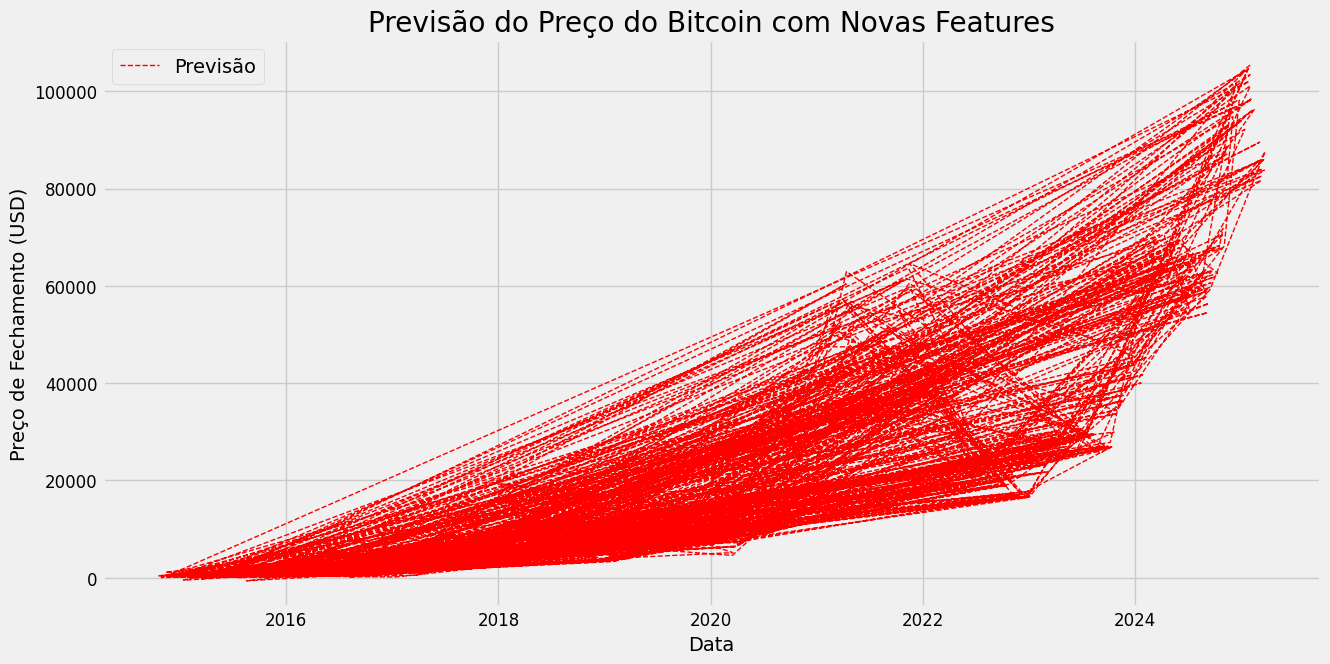

In [24]:
# Plotando as previsões:

plt.figure(figsize=(14,7))
plt.plot(y_test_todos.index, y_pred_todos, label='Previsão', color='red', linewidth=1, linestyle='--')
plt.legend()
plt.title('Previsão do Preço do Bitcoin com Novas Features')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento (USD)')
plt.show()


# Adicionando Margem de Erro às Previsões

#### Calculando a margem de erro usando intervalos de confiança

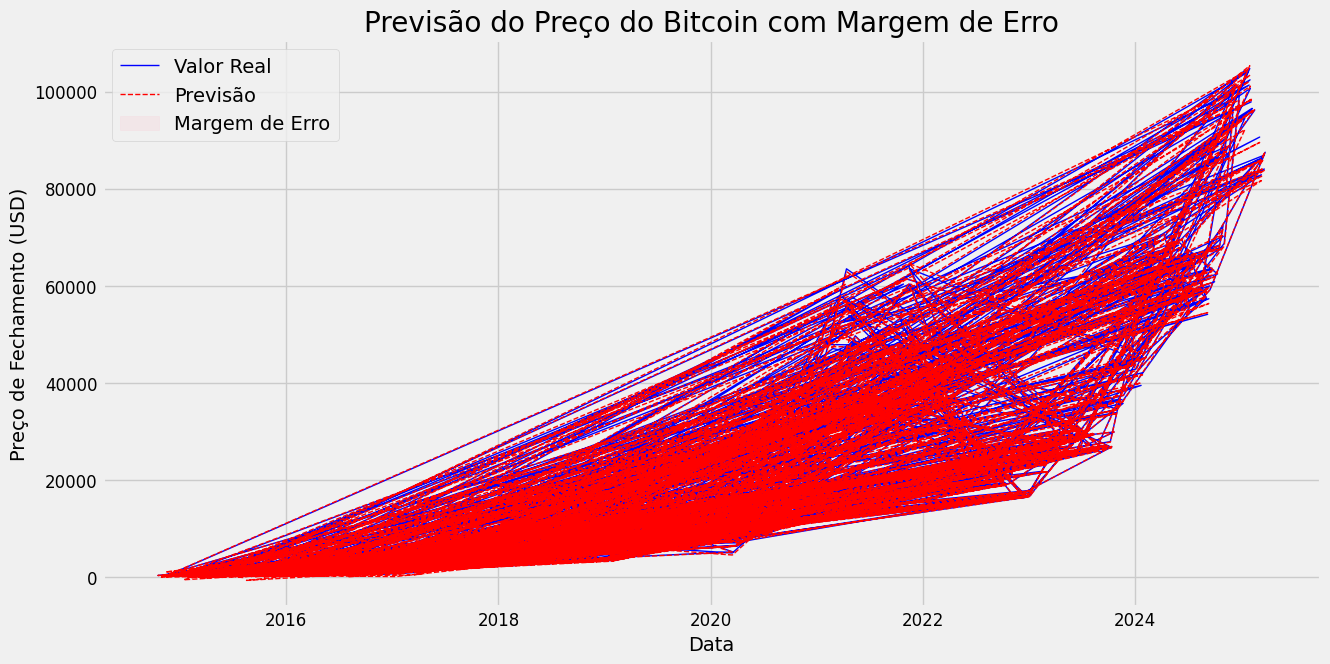

In [25]:
import statsmodels.api as sm

# Adicionando uma constante ao conjunto de dados de treino para a regressão
X_train_todos_const = sm.add_constant(X_train_todos)
modelo_sm = sm.OLS(y_train_todos, X_train_todos_const).fit()

# Previsões com intervalo de confiança
X_test_todos_const = sm.add_constant(X_test_todos)
predicoes = modelo_sm.get_prediction(X_test_todos_const)
intervalo_confidencia = predicoes.conf_int()

# Convertendo para um DataFrame para facilitar a manipulação
intervalo_confidencia_df = pd.DataFrame(intervalo_confidencia, columns=['lower_bound', 'upper_bound'])

# Adicionando as previsões ao DataFrame de intervalo de confiança
intervalo_confidencia_df['prediction'] = y_pred_todos
intervalo_confidencia_df.index = y_test_todos.index

# Plotando os resultados com margem de erro
plt.figure(figsize=(14,7))
plt.plot(y_test_todos.index, y_test_todos, label='Valor Real', color='blue', linewidth=1)
plt.plot(y_test_todos.index, y_pred_todos, label='Previsão', color='red', linewidth=1, linestyle='--')
plt.fill_between(intervalo_confidencia_df.index, intervalo_confidencia_df['lower_bound'], intervalo_confidencia_df['upper_bound'], color='pink', alpha=0.2, label='Margem de Erro')
plt.legend()
plt.title('Previsão do Preço do Bitcoin com Margem de Erro')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento (USD)')
plt.show()

# Análise de Correlação

#### Calculando a correlação entre as features e o preço de fechamento

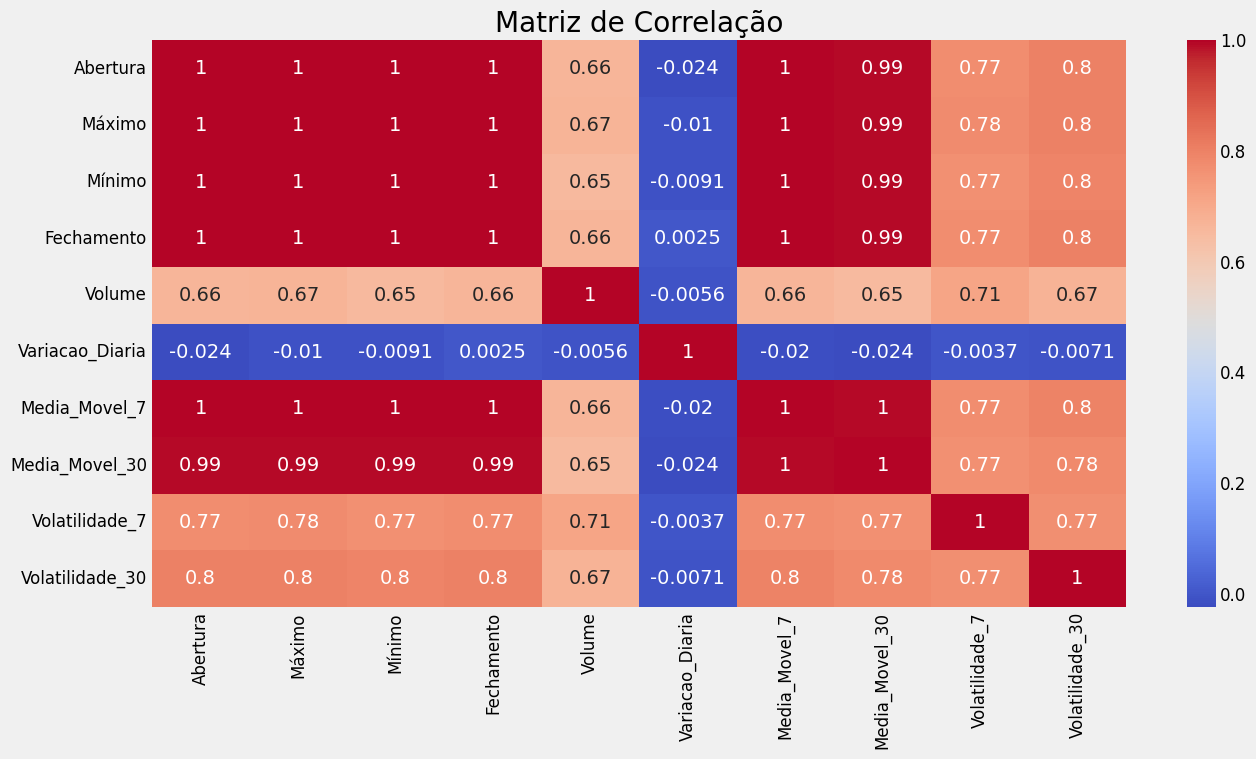

In [26]:
# Calculando a matriz de correlação
correlacao = todos_dados.corr()

# Plotando a matriz de correlação
plt.figure(figsize=(14,7))
sns.heatmap(correlacao, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()


# Análise dos coeficientes do modelo de regressão linear

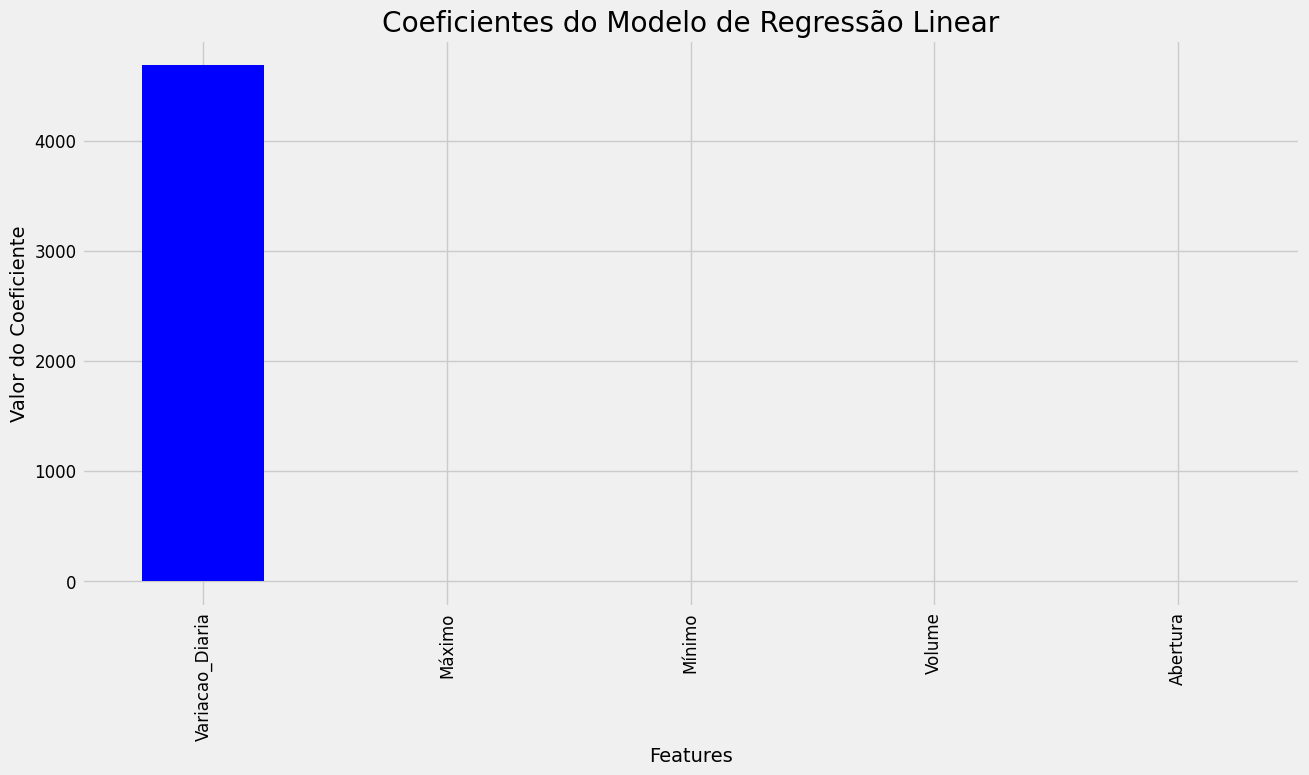

In [27]:
# Treinando o modelo de regressão linear com todas as features
X_todos = todos_dados[['Abertura', 'Máximo', 'Mínimo', 'Volume', 'Variacao_Diaria']]
y_todos = todos_dados['Fechamento']

# Dividindo os dados
X_train_todos, X_test_todos, y_train_todos, y_test_todos = train_test_split(X_todos, y_todos, test_size=0.2, random_state=42)

# Treinando o modelo
modelo_todos = LinearRegression()
modelo_todos.fit(X_train_todos, y_train_todos)

# Coeficientes do modelo
coeficientes = pd.Series(modelo_todos.coef_, index=X_todos.columns).sort_values(ascending=False)

# Plotando os coeficientes do modelo
plt.figure(figsize=(14,7))
coeficientes.plot(kind='bar', color='blue')
plt.title('Coeficientes do Modelo de Regressão Linear')
plt.xlabel('Features')
plt.ylabel('Valor do Coeficiente')
plt.show()


A análise de correlação e os coeficientes do modelo de regressão linear fornecem insights sobre a importância das diferentes features no modelo.

1. **Correlação:** A matriz de correlação mostra a relação linear entre as features e o preço de fechamento. Valores próximos de 1 ou -1 indicam uma forte correlação positiva ou negativa, respectivamente. Features com correlação mais alta com o preço de fechamento tendem a ser mais importantes para o modelo.

2. **Coeficientes do Modelo:** Os coeficientes do modelo de regressão linear representam a magnitude e a direção do impacto de cada feature na previsão do preço de fechamento. Coeficientes positivos indicam que um aumento na feature está associado a um aumento no preço de fechamento, enquanto coeficientes negativos indicam o contrário.

Ao avaliar essas análises, podemos ver quais features têm mais impacto nas previsões do nosso modelo e ajustar nossas estratégias de engenharia de features e modelagem conforme necessário.


# Conclusão

## Antes de qualquer coisa vamos tentar responder a pergunta de milhões: **E se eu tivesse investido X reais no inicio, quanto eu teria hoje?**


In [30]:
# Dados necessários para o cálculo

data_inicial = todos_dados.index[0]
preco_inicial = todos_dados.loc[data_inicial, 'Fechamento']
preco_final = todos_dados['Fechamento'].iloc[-1]

# Investimento inicial
# Cotação do dolar na data 18/09/2014 segundo site: https://www.idealsoftwares.com.br/indices/dolar2014.html

investimento_inicial_usd = 1000
cotacao_dolar_inicial = 2.37
investimento_inicial_brl = 2366.10

# Valor final em USD

investimento_inicial_btc = investimento_inicial_usd / preco_inicial
valor_final_usd = investimento_inicial_btc * preco_final

# Valor final em BRL

investimento_inicial_btc_brl = investimento_inicial_brl / preco_inicial
valor_final_brl = investimento_inicial_btc_brl * preco_final

print(f'Investimento inicial de $1,000 em 18/09/2014 seria equivalente a ${valor_final_usd:.2f} hoje.')
print(f'Investimento inicial de R$2,366.10 em 18/09/2014 seria equivalente a R${valor_final_brl:.2f} hoje.')


Investimento inicial de $1,000 em 18/09/2014 seria equivalente a $228105.37 hoje.
Investimento inicial de R$2,366.10 em 18/09/2014 seria equivalente a R$539720.11 hoje.
